# Indexing

This notebook helps understanding Transflow's core mechanics.

In [1]:
import matplotlib.pyplot as plt
import numpy

In [2]:
def plot_flow(array: numpy.ndarray):
    from matplotlib.axes import Axes
    vmin, vmax = numpy.min(array), numpy.max(array)
    fig, axes_array = plt.subplots(1, 2)
    axes: list[Axes] = axes_array.tolist()
    axes[0].imshow(array[:,:,0], vmin=vmin, vmax=vmax, extent=(0, array.shape[1], 0, array.shape[0]), origin="upper")
    axes[0].set_title("X")
    im = axes[1].imshow(array[:,:,1], vmin=vmin, vmax=vmax, extent=(0, array.shape[1], 0, array.shape[0]), origin="upper")
    axes[1].set_title("Y")
    for ax in axes:
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        ax.set_xticks(range(0, array.shape[1] + 1))
        ax.set_yticks(range(0, array.shape[0] + 1), map(str, range(array.shape[0], -1, -1)))
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            axes[0].text(j+.5, i+.5, array[array.shape[0] - 1 - i,j,0], ha="center", va="center")
            axes[1].text(j+.5, i+.5, array[array.shape[0] - 1 - i,j,1], ha="center", va="center")
    plt.tight_layout()

def plot_mask(array: numpy.ndarray, title: str | None = None):
    plt.figure(figsize=(5, 3))
    plt.imshow(array, origin="upper", vmin=0, vmax=1, cmap="grey", extent=(0, array.shape[1], 0, array.shape[0]))
    plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    plt.xticks(range(0, array.shape[1] + 1))
    plt.yticks(range(0, array.shape[0] + 1), list(map(str, range(array.shape[0], -1, -1))))
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    
def plot_bitmap(array: numpy.ndarray, title: str | None = None):
    plt.figure(figsize=(5, 3))
    plt.imshow(array, origin="upper", extent=(0, array.shape[1], 0, array.shape[0]))
    plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    plt.xticks(range(0, array.shape[1] + 1))
    plt.yticks(range(0, array.shape[0] + 1), list(map(str, range(array.shape[0], -1, -1))))
    if title is not None:
        plt.title(title)
    plt.tight_layout()


Applying the flow to a bitmap.

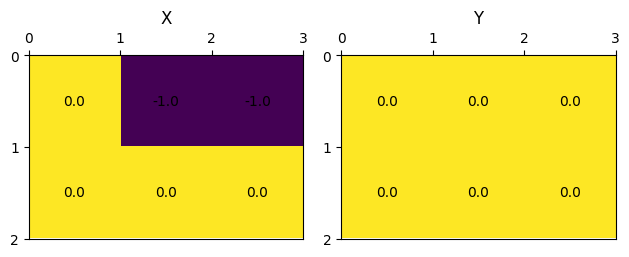

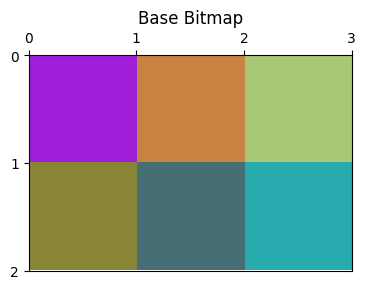

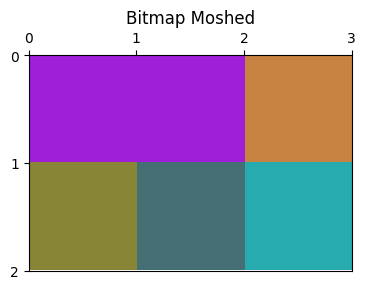

In [3]:
flow = numpy.zeros((2, 3, 2))
flow[0,1] = (-1, 0)
flow[0,2] = (-1, 0)
plot_flow(flow)

bitmap = numpy.random.randint(0, 255, size=(2, 3, 3), dtype=numpy.uint8)
plot_bitmap(bitmap, "Base Bitmap")

flow_int = numpy.round(flow).astype(numpy.int32)
flow_flat = numpy.ravel(flow_int[:,:,1] * 3 + flow_int[:,:,0])
shift = (numpy.arange(2 * 3) + flow_flat) * 3
base = numpy.arange(2 * 3) * 3
bitmap_moshed = numpy.zeros((2, 3, 3), dtype=numpy.uint8)
for i in range(3):
    numpy.put(bitmap_moshed, base+i, bitmap.flat[shift+i], mode="clip")
plot_bitmap(bitmap_moshed, "Bitmap Moshed")


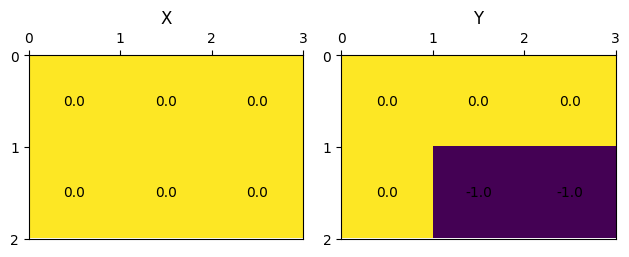

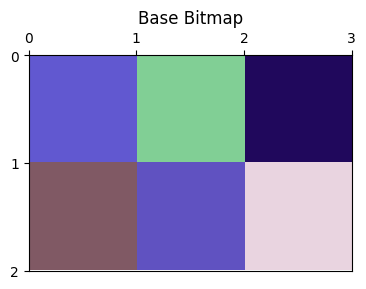

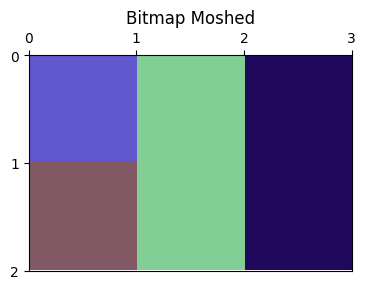

In [4]:
flow = numpy.zeros((2, 3, 2))
flow[1,1] = (0, -1)
flow[1,2] = (0, -1)
plot_flow(flow)

bitmap = numpy.random.randint(0, 255, size=(2, 3, 3), dtype=numpy.uint8)
plot_bitmap(bitmap, "Base Bitmap")

flow_int = numpy.round(flow).astype(numpy.int32)
flow_flat = numpy.ravel(flow_int[:,:,1] * 3 + flow_int[:,:,0])
shift = (numpy.arange(2 * 3) + flow_flat) * 3
base = numpy.arange(2 * 3) * 3
bitmap_moshed = numpy.zeros((2, 3, 3), dtype=numpy.uint8)
for i in range(3):
    numpy.put(bitmap_moshed, base+i, bitmap.flat[shift+i], mode="clip")
plot_bitmap(bitmap_moshed, "Bitmap Moshed")


Moshing a mask designed to filter the starting position of moving pixels and express it as a matrix of end positions.

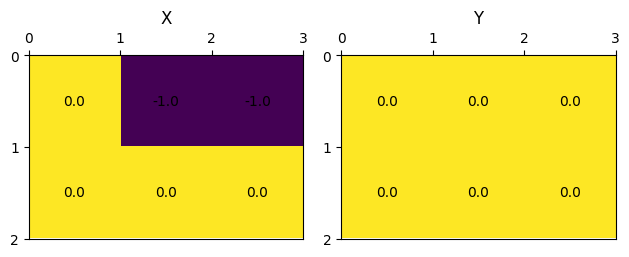

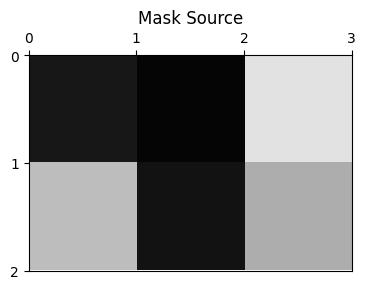

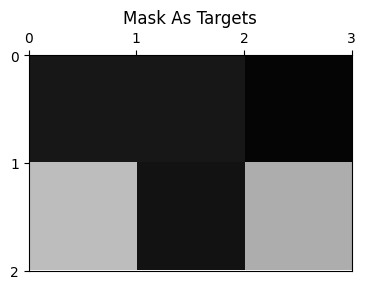

In [5]:
flow = numpy.zeros((2, 3, 2))
flow[0,1] = (-1, 0)
flow[0,2] = (-1, 0)
plot_flow(flow)

# mask = numpy.ones((2, 3), dtype=int)
# mask[:,0] = 0
mask = numpy.random.random((2, 3))
plot_mask(mask, "Mask Source")

# Compositor._update_move
flow_int = numpy.round(flow).astype(numpy.int32)
flow_flat = numpy.ravel(flow_int[:,:,1] * 3 + flow_int[:,:,0])
shift = numpy.arange(2 * 3) + flow_flat
mask_rev = mask.flat[shift].reshape((2, 3))
plot_mask(mask_rev, "Mask As Targets")